Chọn phương pháp biến đổi ảnh:
I - Image Inverse
G - Gamma Correction
L - Log Transformation
H - Histogram Equalization
C - Contrast Stretching
Đang xử lý ảnh: ha-long-bay-in-vietnam.jpg...


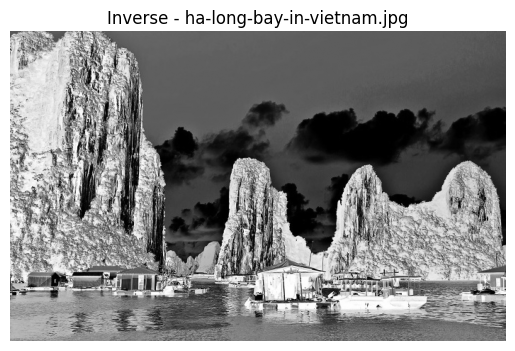

Đang xử lý ảnh: pagoda.jpg...


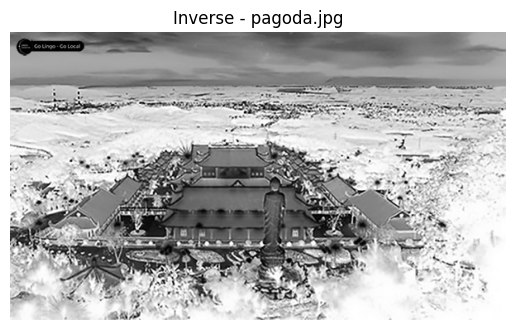

Đang xử lý ảnh: quang_ninh.jpg...


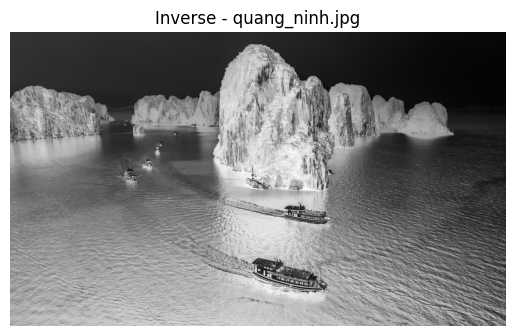

In [16]:
# Bài 1
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 1. Các hàm xử lý ảnh (chỉ dùng PIL + numpy)
def inverse_image(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    img = img / 255.0
    result = np.power(img, gamma)
    return np.uint8(result * 255)

def log_transformation(img):
    c = 255 / np.log(1 + np.max(img))
    result = c * np.log(1 + img)
    return np.uint8(result)

def histogram_equalization(img):
    # Tự viết hàm equalization (không dùng OpenCV)
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_masked = np.ma.masked_equal(cdf, 0)
    cdf_norm = (cdf_masked - cdf_masked.min()) * 255 / (cdf_masked.max() - cdf_masked.min())
    cdf_final = np.ma.filled(cdf_norm, 0).astype('uint8')
    return cdf_final[img]

def contrast_stretching(img):
    a, b = np.min(img), np.max(img)
    stretched = 255 * (img - a) / (b - a)
    return np.uint8(stretched)

# 2. Bản đồ chọn hàm
methods = {
    'I': ('Inverse', inverse_image),
    'G': ('Gamma Correction', gamma_correction),
    'L': ('Log Transformation', log_transformation),
    'H': ('Histogram Equalization', histogram_equalization),
    'C': ('Contrast Stretching', contrast_stretching)
}

# 3. Hiển thị menu
print("Chọn phương pháp biến đổi ảnh:")
print("I - Image Inverse")
print("G - Gamma Correction")
print("L - Log Transformation")
print("H - Histogram Equalization")
print("C - Contrast Stretching")

choice = input("Nhập lựa chọn (I/G/L/H/C): ").upper()

if choice not in methods:
    print("Lựa chọn không hợp lệ.")
    exit()

method_name, method_function = methods[choice]

# 4. Đọc ảnh từ thư mục exercise/
input_folder = 'exercise'
output_folder = os.path.join(input_folder, 'output')
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.png')):
        input_path = os.path.join(input_folder, filename)
        print(f"Đang xử lý ảnh: {filename}...")

        # Mở ảnh xám
        img = Image.open(input_path).convert('L')
        img_np = np.array(img)

        # Áp dụng biến đổi
        if choice == 'G':
            result_np = method_function(img_np, gamma=2.2)
        else:
            result_np = method_function(img_np)

        # Lưu và hiển thị ảnh kết quả
        output_path = os.path.join(output_folder, f'{choice}_{filename}')
        Image.fromarray(result_np).save(output_path)

        plt.imshow(result_np, cmap='gray')
        plt.title(f"{method_name} - {filename}")
        plt.axis('off')
        plt.show()



Chọn phương pháp biến đổi ảnh:
F - Fast Fourier Transform
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter
▶ Đang xử lý ảnh: ha-long-bay-in-vietnam.jpg...


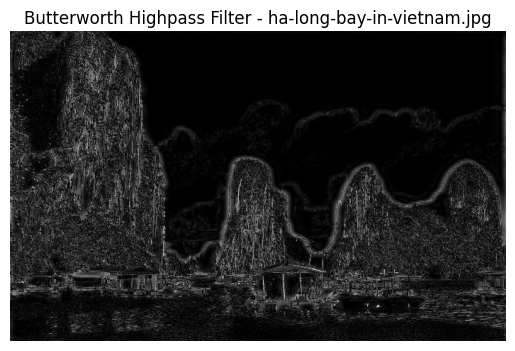

▶ Đang xử lý ảnh: pagoda.jpg...


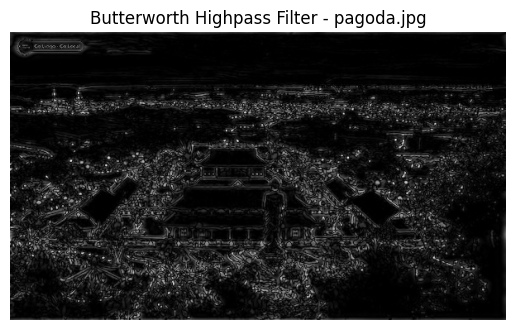

▶ Đang xử lý ảnh: quang_ninh.jpg...


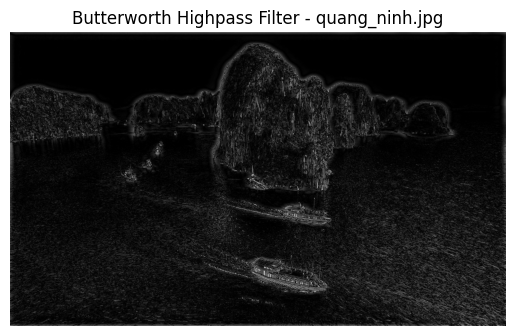

✅ Hoàn thành xử lý ảnh Bài 2.


In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def fft_spectrum(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(1 + np.abs(fshift))
    return np.uint8(magnitude_spectrum / np.max(magnitude_spectrum) * 255)

def butterworth_lowpass(img, cutoff=30, order=2):
    rows, cols = img.shape
    crow, ccol = rows // 2 , cols // 2

    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - crow)**2 + (V - ccol)**2)
    H = 1 / (1 + (D / cutoff)**(2 * order))

    F = np.fft.fft2(img)
    Fshift = np.fft.fftshift(F)
    G = H * Fshift
    G_ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(G_ishift)
    return np.uint8(np.abs(img_back))

def butterworth_highpass(img, cutoff=30, order=2):
    rows, cols = img.shape
    crow, ccol = rows // 2 , cols // 2

    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - crow)**2 + (V - ccol)**2)
    H = 1 / (1 + (cutoff / (D + 1e-5))**(2 * order))  # tránh chia 0

    F = np.fft.fft2(img)
    Fshift = np.fft.fftshift(F)
    G = H * Fshift
    G_ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(G_ishift)
    return np.uint8(np.abs(img_back))

# Bản đồ lựa chọn
methods = {
    'F': ('Fast Fourier Spectrum', fft_spectrum),
    'L': ('Butterworth Lowpass Filter', butterworth_lowpass),
    'H': ('Butterworth Highpass Filter', butterworth_highpass)
}

# Hiển thị menu
print("Chọn phương pháp biến đổi ảnh:")
print("F - Fast Fourier Transform")
print("L - Butterworth Lowpass Filter")
print("H - Butterworth Highpass Filter")

choice = input("Nhập lựa chọn (F/L/H): ").upper()

if choice not in methods:
    print("❌ Lựa chọn không hợp lệ.")
    exit()

method_name, method_function = methods[choice]

# Thư mục chứa ảnh
input_folder = 'exercise'
output_folder = os.path.join(input_folder, 'output_bai2')
os.makedirs(output_folder, exist_ok=True)

# Áp dụng với mọi ảnh
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.png')):
        input_path = os.path.join(input_folder, filename)
        print(f"▶ Đang xử lý ảnh: {filename}...")

        img = Image.open(input_path).convert('L')
        img_np = np.array(img)

        # Áp dụng biến đổi
        result = method_function(img_np)

        output_path = os.path.join(output_folder, f'{choice}_{filename}')
        Image.fromarray(result).save(output_path)

        # Hiển thị ảnh kết quả
        plt.imshow(result, cmap='gray')
        plt.title(f"{method_name} - {filename}")
        plt.axis('off')
        plt.show()




▶ Xử lý ảnh: ha-long-bay-in-vietnam.jpg


C:\Users\Admin\AppData\Local\Temp\ipykernel_3692\2983238479.py:18: RuntimeWarning: divide by zero encountered in log
  log_img = np.log(img)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3692\2983238479.py:20: RuntimeWarning: invalid value encountered in cast
  return np.uint8(log_img)


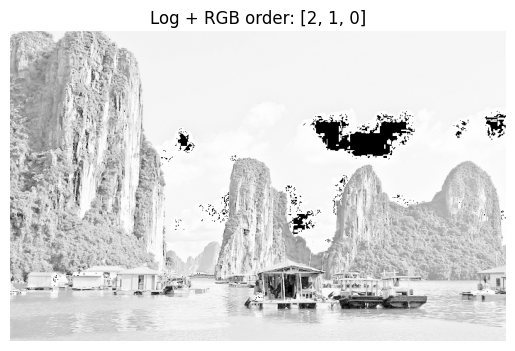

▶ Xử lý ảnh: pagoda.jpg


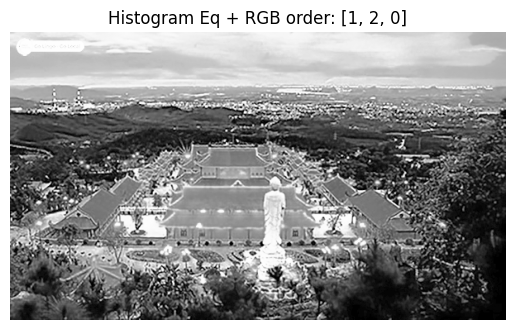

▶ Xử lý ảnh: quang_ninh.jpg


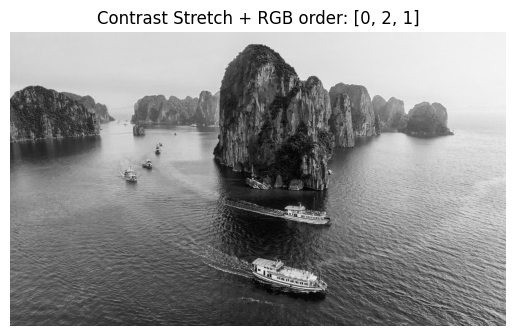

✅ Hoàn thành xử lý ảnh Bài 3.


In [ ]:
# Bài 3
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random

# Các phép biến đổi ảnh câu 1
def inverse(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    normalized = img / 255.0
    corrected = np.power(normalized, 1.0 / gamma)
    return np.uint8(corrected * 255)

def log_transform(img):
    img = img + 1  # tránh log(0)
    log_img = np.log(img)
    log_img = log_img / np.max(log_img) * 255
    return np.uint8(log_img)

def histogram_equalization(img):
    hist, bins = np.histogram(img.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf = cdf * 255 / cdf[-1]
    img_eq = np.interp(img.flatten(), bins[:-1], cdf)
    return np.uint8(img_eq.reshape(img.shape))

def contrast_stretching(img):
    min_val, max_val = np.min(img), np.max(img)
    stretched = (img - min_val) / (max_val - min_val) * 255
    return np.uint8(stretched)

# Danh sách các phép biến đổi grayscale
gray_methods = [
    ('Inverse', inverse),
    ('Gamma', gamma_correction),
    ('Log', log_transform),
    ('Histogram Eq', histogram_equalization),
    ('Contrast Stretch', contrast_stretching)
]

# Đổi thứ tự RGB
def shuffle_rgb(img_rgb):
    img_array = np.array(img_rgb)
    channels = [0, 1, 2]
    random.shuffle(channels)
    shuffled = img_array[:, :, channels]
    return Image.fromarray(shuffled), channels

# Thư mục
input_folder = 'exercise'
output_folder = os.path.join(input_folder, 'output_bai3')
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.png')):
        print(f"▶ Xử lý ảnh: {filename}")

        img_path = os.path.join(input_folder, filename)
        img_rgb = Image.open(img_path).convert('RGB')

        # Đảo kênh màu
        shuffled_img, new_order = shuffle_rgb(img_rgb)

        # Chuyển sang grayscale để áp dụng phép biến đổi
        gray_img = np.array(shuffled_img.convert('L'))

        # Chọn ngẫu nhiên một phương pháp
        method_name, method_func = random.choice(gray_methods)
        transformed = method_func(gray_img)

        # Lưu và hiển thị kết quả
        output_path = os.path.join(output_folder, f"{method_name}_{filename}")
        Image.fromarray(transformed).save(output_path)

        plt.imshow(transformed, cmap='gray')
        plt.title(f"{method_name} + RGB order: {new_order}")
        plt.axis('off')
        plt.show()




▶ Xử lý ảnh: ha-long-bay-in-vietnam.jpg


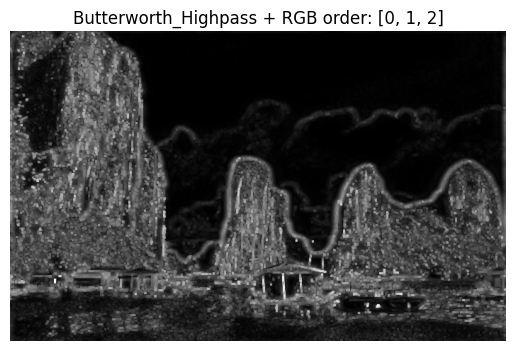

▶ Xử lý ảnh: pagoda.jpg


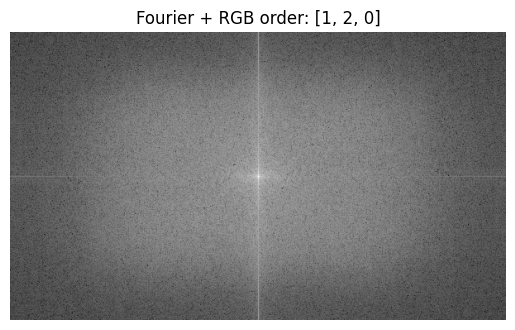

▶ Xử lý ảnh: quang_ninh.jpg


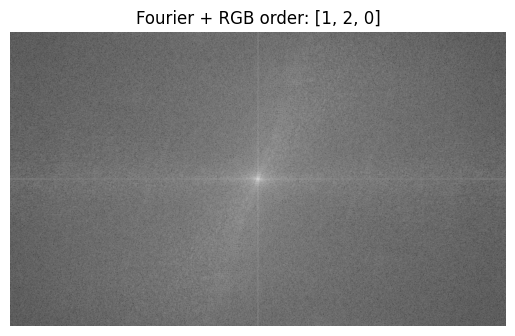

In [15]:
#Bài 4
import os
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import random

# FFT
def fast_fourier(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return np.uint8(magnitude_spectrum / np.max(magnitude_spectrum) * 255)

# Butterworth Lowpass Filter
def butterworth_lowpass(img, d0=30, n=2):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    u, v = np.meshgrid(np.arange(cols), np.arange(rows))
    D = np.sqrt((u - ccol) ** 2 + (v - crow) ** 2)
    H = 1 / (1 + (D / d0) ** (2 * n))

    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    filtered = fshift * H
    ishift = np.fft.ifftshift(filtered)
    img_back = np.fft.ifft2(ishift)
    return np.uint8(np.abs(img_back))

# Butterworth Highpass Filter
def butterworth_highpass(img, d0=30, n=2):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    u, v = np.meshgrid(np.arange(cols), np.arange(rows))
    D = np.sqrt((u - ccol) ** 2 + (v - crow) ** 2)
    H = 1 / (1 + (d0 / (D + 1e-5)) ** (2 * n))  # tránh chia cho 0

    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    filtered = fshift * H
    ishift = np.fft.ifftshift(filtered)
    img_back = np.fft.ifft2(ishift)
    return np.uint8(np.abs(img_back))

# Đảo kênh màu RGB
def shuffle_rgb(img_rgb):
    arr = np.array(img_rgb)
    order = [0, 1, 2]
    random.shuffle(order)
    return Image.fromarray(arr[:, :, order]), order

# Thư mục ảnh
input_folder = 'exercise'
output_folder = os.path.join(input_folder, 'output_bai4')
os.makedirs(output_folder, exist_ok=True)

# Danh sách phép biến đổi
methods = [
    ('Fourier', fast_fourier),
    ('Butterworth_Lowpass', butterworth_lowpass),
    ('Butterworth_Highpass', butterworth_highpass)
]

# Xử lý từng ảnh
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.png')):
        print(f"▶ Xử lý ảnh: {filename}")
        img_path = os.path.join(input_folder, filename)
        img_rgb = Image.open(img_path).convert('RGB')

        # Đảo kênh màu RGB
        shuffled_img, rgb_order = shuffle_rgb(img_rgb)

        # Chuyển sang grayscale để biến đổi tần số
        gray_img = np.array(shuffled_img.convert('L'))

        # Chọn phương pháp ngẫu nhiên
        method_name, method_func = random.choice(methods)
        transformed = method_func(gray_img)

        # Áp dụng Min hoặc Max Filter nếu là Butterworth
        if method_name == 'Butterworth_Lowpass':
            pil_img = Image.fromarray(transformed)
            pil_img = pil_img.filter(ImageFilter.MinFilter(3))
        elif method_name == 'Butterworth_Highpass':
            pil_img = Image.fromarray(transformed)
            pil_img = pil_img.filter(ImageFilter.MaxFilter(3))
        else:
            pil_img = Image.fromarray(transformed)

        # Lưu và hiển thị
        output_path = os.path.join(output_folder, f"{method_name}_{filename}")
        pil_img.save(output_path)

        plt.imshow(pil_img, cmap='gray')
        plt.title(f"{method_name} + RGB order: {rgb_order}")
        plt.axis('off')
        plt.show()


